In [1]:
import psutil
import time

def monitor_resources(duration, interval=1):
    # Start- und Endzeit festlegen
    start_time = time.time()
    end_time = start_time + duration
    
    # Listen zur Speicherung der Ressourcendaten
    cpu_usage = []
    memory_usage = []
    
    while time.time() < end_time:
        # CPU und RAM Nutzung ermitteln
        cpu = psutil.cpu_percent(interval=interval)
        memory = psutil.virtual_memory().percent
        
        # Daten speichern
        cpu_usage.append(cpu)
        memory_usage.append(memory)
        
        # Warten bis zum nächsten Intervall
        time.sleep(interval - 0.1)
    
    return cpu_usage, memory_usage

# Nutzung des Monitors für 45 Minuten
cpu_usage, memory_usage = monitor_resources(duration=2700, interval=1)

# Ergebnisse können dann analysiert oder gespeichert werden
print(cpu_usage, memory_usage)


[23.8, 11.1, 10.6, 14.2, 11.7, 20.3, 11.2, 8.0, 10.4, 12.3, 12.4, 11.3, 7.9, 9.2, 13.0, 12.3, 9.9, 8.2, 18.6, 22.3, 12.7, 9.8, 11.3, 26.1, 21.6, 13.3, 10.9, 9.1, 11.2, 13.8, 14.8, 12.5, 8.1, 13.6, 12.8, 12.9, 11.9, 9.6, 12.6, 13.3, 12.0, 11.9, 9.5, 11.7, 12.7, 12.3, 10.8, 10.8, 11.2, 13.2, 12.4, 10.6, 10.9, 10.8, 13.0, 14.3, 13.5, 10.3, 11.3, 12.4, 13.3, 11.7, 10.3, 12.0, 13.4, 13.0, 27.1, 9.9, 9.9, 12.2, 12.7, 14.9, 11.9, 9.4, 14.1, 13.3, 12.2, 12.3, 9.8, 13.2, 12.6, 12.2, 10.3, 10.1, 11.9, 14.0, 11.8, 9.7, 11.6, 12.3, 13.4, 12.4, 9.4, 11.3, 12.2, 12.6, 13.3, 9.1, 10.1, 12.9, 12.7, 12.8, 9.3, 10.1, 13.0, 12.6, 11.9, 11.3, 25.6, 11.8, 13.8, 12.1, 10.6, 10.1, 14.2, 14.6, 11.7, 10.4, 11.2, 12.4, 13.1, 11.8, 9.5, 10.8, 26.3, 13.6, 14.3, 10.2, 9.7, 12.7, 13.4, 13.6, 10.9, 9.0, 12.0, 12.6, 13.0, 11.6, 8.5, 10.9, 13.5, 12.7, 12.4, 9.5, 10.4, 13.0, 13.2, 12.0, 11.2, 9.7, 17.9, 29.7, 12.2, 11.6, 10.5, 11.5, 16.0, 11.4, 10.0, 12.0, 13.0, 13.9, 13.6, 9.3, 11.3, 12.0, 18.4, 15.1, 10.4, 10.0, 12.6

In [2]:
# TBATS for the prediction of energy consumption data over 48 hours

In [3]:
import sys
print(sys.executable)

/home/sarah/anaconda3/envs/BT2024SARIMAModel/bin/python


In [4]:
#Install all required packages with 'conda install NAME' or with pip install NAME'
# pandas
# tbats
# numpy
# matplotlib
# scikit-learn

In [5]:
#Import all required libraries
import pandas as pd  # Used for data manipulation and analysis
from pathlib import Path  # Used for filesystem path manipulation
from tbats import TBATS  # Used for time series forecasting using TBATS model
import numpy as np  # Used for numerical operations
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Used for calculating error metrics
import matplotlib.pyplot as plt  # Used for creating static, interactive, and animated visualizations
import matplotlib.dates as mdates  # Used for formatting date data on matplotlib plots

In [6]:
#To display the current environment
import sys
print(sys.executable)

/home/sarah/anaconda3/envs/BT2024SARIMAModel/bin/python


In [7]:
# Step 1 - Reading Data

## dfEnergyAll: All data from the transformer station from 2021-2023

# Path to the directory with the Excel files
directory_path = Path('/home/sarah/Documents/BT2024/All')

# Create a list of all Excel files in the directory
file_paths = list(directory_path.glob('*.xlsx'))

# List for storing individual DataFrames
dfs = []

# Loop over all file paths
for file_path in file_paths:
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Convert the 'Timestamp' column into datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Convert the 'Lastgang' column into a numeric data type, errors are treated as NaN
    df['Lastgang'] = pd.to_numeric(df['Lastgang'], errors='coerce')
    
    # Sort the DataFrame by 'Timestamp'
    df = df.sort_values(by='Timestamp')
    
    # Perform a linear interpolation for 'Lastgang' on the individual DataFrame
    df['Lastgang'] = df['Lastgang'].interpolate(method='linear')
    
    # Add the DataFrame to the list
    dfs.append(df)

# Merge all DataFrames in the list
dfEnergyAll = pd.concat(dfs).set_index('Timestamp')

# Sum the Lastgang values for identical timestamps
dfEnergyAll = dfEnergyAll.groupby('Timestamp').sum()

# Check the resulting DataFrame
print("First and last rows from dfEnergyAll:")
print(dfEnergyAll.head())
print(dfEnergyAll.tail())

# Display the number of rows in dfEnergyAll
print("Number of rows in dfEnergyAll:", dfEnergyAll.shape[0])

First and last rows from dfEnergyAll:
                     Lastgang
Timestamp                    
2021-01-01 00:00:00    472.88
2021-01-01 00:15:00    498.83
2021-01-01 00:30:00    480.48
2021-01-01 00:45:00    446.74
2021-01-01 01:00:00    459.55
                     Lastgang
Timestamp                    
2023-12-31 22:45:00    833.17
2023-12-31 23:00:00    767.89
2023-12-31 23:15:00    770.04
2023-12-31 23:30:00    730.45
2023-12-31 23:45:00    744.21
Number of rows in dfEnergyAll: 105108


In [8]:
# Step 2 - Preparing the Data

# Create a complete timestamp index for the years 2021 - 2023 in 15-minute intervals
all_timestamps = pd.date_range(start='2021-01-01 00:00:00', end='2023-12-31 23:45:00', freq='15T')

# Convert this into a DataFrame
df_all_timestamps = pd.DataFrame(all_timestamps, columns=['Timestamp'])
df_all_timestamps = df_all_timestamps.set_index('Timestamp')

# Compare the complete timestamp index with dfEnergyAll
missing_timestamps = df_all_timestamps.index.difference(dfEnergyAll.index)

print("Missing timestamps in dfEnergyAll:")
print(missing_timestamps)


# Missing timestamps
missing_timestamps = pd.DatetimeIndex(['2021-03-28 02:00:00', '2021-03-28 02:15:00',
                                       '2021-03-28 02:30:00', '2021-03-28 02:45:00',
                                       '2022-03-27 02:00:00', '2022-03-27 02:15:00',
                                       '2022-03-27 02:30:00', '2022-03-27 02:45:00',
                                       '2023-03-26 02:00:00', '2023-03-26 02:15:00',
                                       '2023-03-26 02:30:00', '2023-03-26 02:45:00'])

# Create a DataFrame with the missing timestamps
df_missing = pd.DataFrame(index=missing_timestamps)

# Merge this DataFrame with the original DataFrame
dfEnergyAll = dfEnergyAll.combine_first(df_missing)

# Fill in the missing values. Use 'ffill' for forward fill.
dfEnergyAll = dfEnergyAll.sort_index().fillna(method='ffill')

print("Check after adding the missing timestamps:")
print(dfEnergyAll.loc[missing_timestamps])

# Number of rows in dfEnergyAll
print("Number of rows in dfEnergyAll:", dfEnergyAll.shape[0])

Missing timestamps in dfEnergyAll:
DatetimeIndex(['2021-03-28 02:00:00', '2021-03-28 02:15:00',
               '2021-03-28 02:30:00', '2021-03-28 02:45:00',
               '2022-03-27 02:00:00', '2022-03-27 02:15:00',
               '2022-03-27 02:30:00', '2022-03-27 02:45:00',
               '2023-03-26 02:00:00', '2023-03-26 02:15:00',
               '2023-03-26 02:30:00', '2023-03-26 02:45:00'],
              dtype='datetime64[ns]', name='Timestamp', freq=None)
Check after adding the missing timestamps:
                     Lastgang
2021-03-28 02:00:00    372.28
2021-03-28 02:15:00    372.28
2021-03-28 02:30:00    372.28
2021-03-28 02:45:00    372.28
2022-03-27 02:00:00    554.20
2022-03-27 02:15:00    554.20
2022-03-27 02:30:00    554.20
2022-03-27 02:45:00    554.20
2023-03-26 02:00:00    520.34
2023-03-26 02:15:00    520.34
2023-03-26 02:30:00    520.34
2023-03-26 02:45:00    520.34
Number of rows in dfEnergyAll: 105120


/tmp/ipykernel_955451/1014544308.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfEnergyAll = dfEnergyAll.sort_index().fillna(method='ffill')


## Performing TBATS with energy consumption data for the years 2021-2023

In [9]:
# Step 3 - Creating the TBATS model and generating predictions

# Define training size (All data except the last 48 hours) and test size (48 hours)
train_size = len(dfEnergyAll) - (2 * 24 * 4)  
test_size = 2 * 24 * 4  

# Split into training and test data
train_data = dfEnergyAll['Lastgang'][:train_size]
test_data = dfEnergyAll['Lastgang'][train_size:]

# Model initialization and training
# 96 as the period for daily seasonality, 672 as the period for weekly seasonality (at 15-minute intervals)
estimator = TBATS(seasonal_periods=[96, 672], use_arma_errors=False, use_box_cox=False)
fitted_model = estimator.fit(train_data)

# Create forecasts for the length of the test size (48 hours)
y_forecast = fitted_model.forecast(steps=test_size)

# Annotate forecast results with timestamps
last_timestamp = dfEnergyAll.index[train_size - 1]
future_timestamps = pd.date_range(start=last_timestamp, periods=test_size + 1, freq='15T')[1:]
forecast_series = pd.Series(y_forecast, index=future_timestamps)

# Annual seasonality not integrated into the model as a period because it already provides good results and could lead to overfitting

Akaike Information Criterion (AIC): 2004401.1178947324
Mean Squared Error (MSE) for the last 2 days: 16455.892322387703
Mean Absolute Error (MAE) for the last 2 days: 85.23397838663617
Root Mean Square Error (RMSE) for the last 2 days: 128.2805219914064
Mean Absolute Percentage Error (MAPE) for the last 2 days: 9.996047807944556%


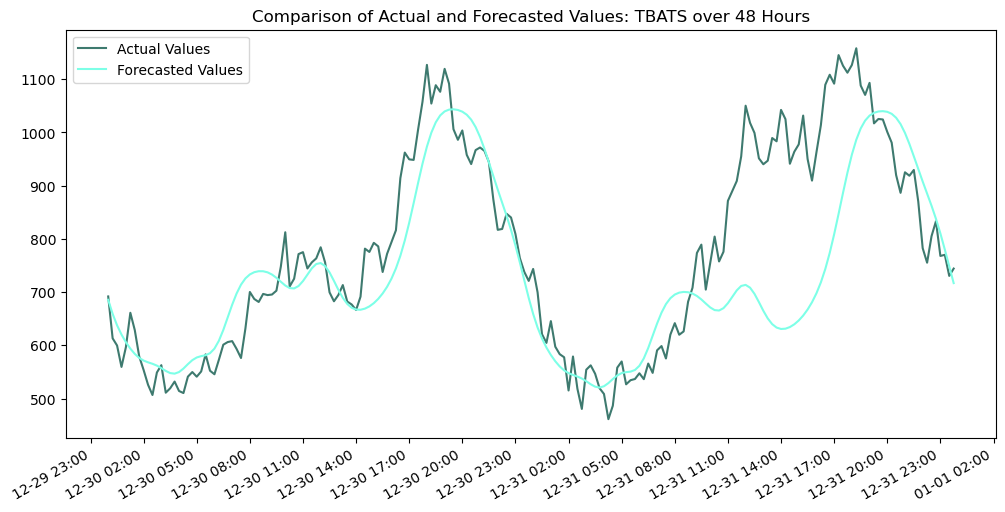

In [10]:
# Step 4 - Error metrics and visualization

# Output AIC and BIC
print(f"Akaike Information Criterion (AIC): {fitted_model.aic}")

# Calculate error metrics
mse = mean_squared_error(test_data, forecast_series)
mae = mean_absolute_error(test_data, forecast_series)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - forecast_series) / test_data)) * 100

# Output error metrics
print(f"Mean Squared Error (MSE) for the last 2 days: {mse}")
print(f"Mean Absolute Error (MAE) for the last 2 days: {mae}")
print(f"Root Mean Square Error (RMSE) for the last 2 days: {rmse}")
print(f"Mean Absolute Percentage Error (MAPE) for the last 2 days: {mape}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Values', color='#3E7A6F')
plt.plot(future_timestamps, forecast_series, label='Forecasted Values', color='#7DFFE7')
plt.legend()
plt.title('Comparison of Actual and Forecasted Values: TBATS over 48 Hours')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.show()

In [11]:
import numpy as np

# Berechnung der Anzahl der Beobachtungen
n = len(train_data)

# Berechnung der Residuen und der RSS
# Überprüfen Sie, ob fitted_model.y_hat existiert oder berechnen Sie die Vorhersagen neu
try:
    y_hat = fitted_model.y_hat
except AttributeError:
    y_hat = fitted_model.forecast(steps=len(train_data))  # Vorhersage neu berechnen

residuals = train_data - y_hat
RSS = np.sum(residuals**2)

# Schätzung der Anzahl der Parameter (k)
k = 2 * 3 * len(estimator.seasonal_periods)  # Annehmen 3 Fourier-Terme pro Saisonalität

# Berechnung des BIC
BIC = n * np.log(RSS / n) + k * np.log(n)

print(f'BIC: {BIC}')

BIC: 791370.1280251632


## The same TBATS model, but with 'use_arma_errors=True'

In [ ]:
# Step 3 - Creating the TBATS model and generating predictions

# Define training size (All data except the last 48 hours) and test size (48 hours)
train_size = len(dfEnergyAll) - (2 * 24 * 4)  
test_size = 2 * 24 * 4  

# Split into training and test data
train_data = dfEnergyAll['Lastgang'][:train_size]
test_data = dfEnergyAll['Lastgang'][train_size:]

# Model initialization and training
# 96 as the period for daily seasonality, 672 as the period for weekly seasonality (at 15-minute intervals)
estimator = TBATS(seasonal_periods=[96, 672], use_arma_errors=True, use_box_cox=False)
fitted_model = estimator.fit(train_data)

# Create forecasts for the length of the test size (48 hours)
y_forecast = fitted_model.forecast(steps=test_size)

# Annotate forecast results with timestamps
last_timestamp = dfEnergyAll.index[train_size - 1]
future_timestamps = pd.date_range(start=last_timestamp, periods=test_size + 1, freq='15T')[1:]
forecast_series = pd.Series(y_forecast, index=future_timestamps)

# Annual seasonality not integrated into the model as a period because it already provides good results and could lead to overfitting

In [ ]:
# Step 4 - Error metrics and visualization

# Output AIC and BIC
print(f"Akaike Information Criterion (AIC): {fitted_model.aic}")
print(f"Bayesian Information Criterion (BIC): {fitted_model.bic}")

# Calculate error metrics
mse = mean_squared_error(test_data, forecast_series)
mae = mean_absolute_error(test_data, forecast_series)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - forecast_series) / test_data)) * 100

# Output error metrics
print(f"Mean Squared Error (MSE) for the last 2 days: {mse}")
print(f"Mean Absolute Error (MAE) for the last 2 days: {mae}")
print(f"Root Mean Square Error (RMSE) for the last 2 days: {rmse}")
print(f"Mean Absolute Percentage Error (MAPE) for the last 2 days: {mape}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Values', color='#3E7A6F')
plt.plot(future_timestamps, forecast_series, label='Forecasted Values', color='#7DFFE7')
plt.legend()
plt.title('Comparison of Actual and Forecasted Values: TBATS over 48 Hours')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.show()